In [1]:
from sklearn.metrics import rand_score
from sklearn import datasets
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Clustering

In [2]:
df = pd.read_csv('cure-t2-4k-m.csv')


c:\Users\Michail\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Michail\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Michail\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Michail\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

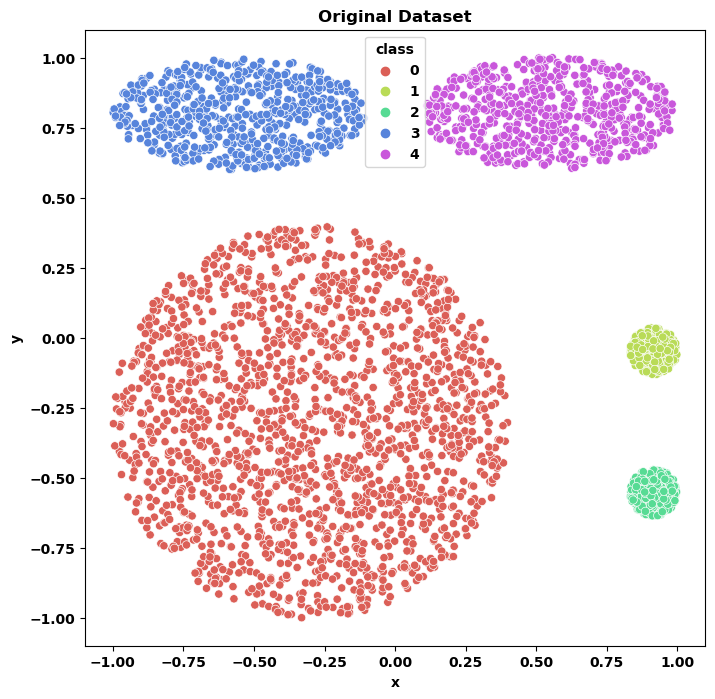

In [3]:
from sklearn.cluster import KMeans

X = df

# km5 = KMeans(n_clusters=5).fit(X)

# X['Labels'] = km5.labels_
plt.figure(figsize=(8, 8))
sns.scatterplot(x=X['x'], y=X['y'], hue=X['class'], palette=sns.color_palette('hls', 5))

plt.title('Original Dataset')
plt.show()


c:\Users\Michail\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Michail\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Michail\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Michail\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inste

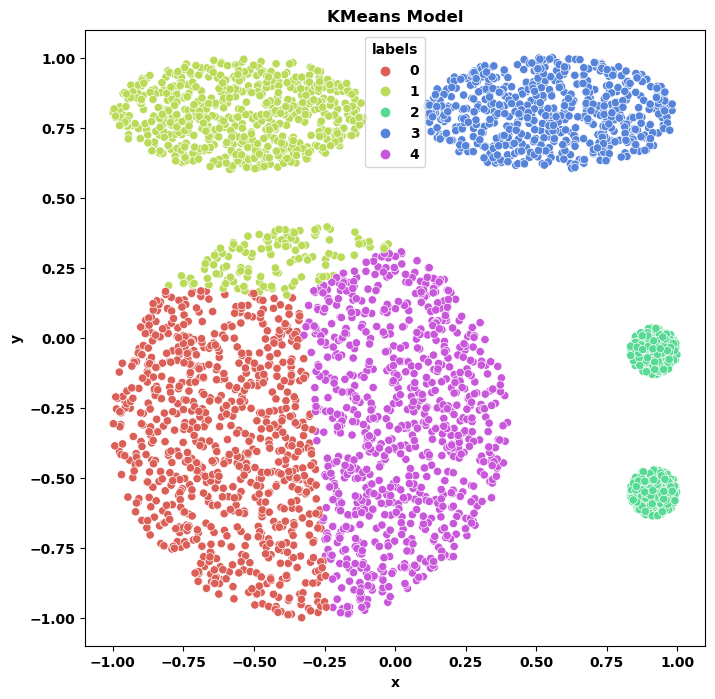

In [4]:
from sklearn.cluster import KMeans
X = df[['x', 'y']]

k_means_model = KMeans(n_clusters=5).fit(X)

X['labels'] = k_means_model.labels_

plt.figure(figsize=(8, 8))
sns.scatterplot(x=X['x'], y=X['y'], hue=X['labels'], palette=sns.color_palette('hls', 5))

plt.title('KMeans Model')
plt.show()



In [5]:
rand_score(df['class'], X['labels'])

0.8429583184753754

c:\Users\Michail\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Michail\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Michail\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Michail\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

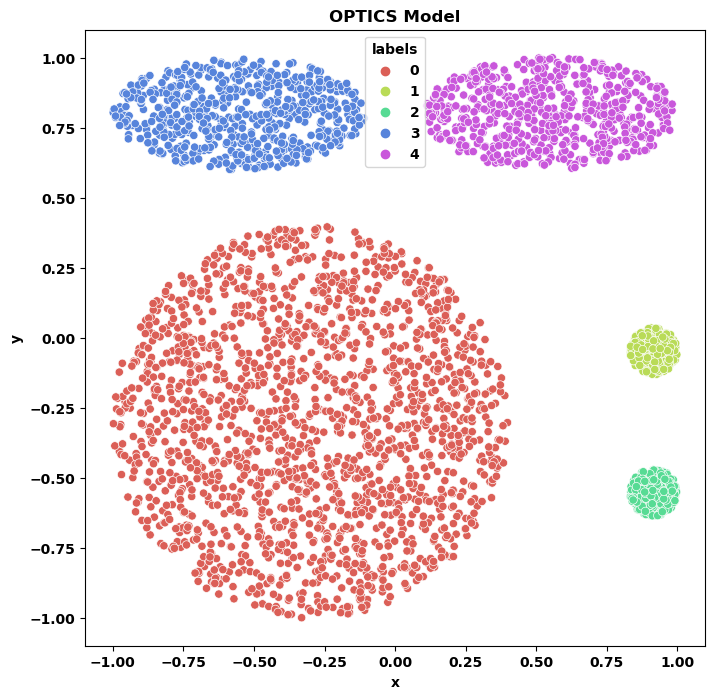

In [6]:
from sklearn.cluster import OPTICS

X = df[['x', 'y']]
optics_model = OPTICS(min_samples=50).fit(df)

X['labels'] = optics_model.labels_

plt.figure(figsize=(8, 8))
sns.scatterplot(x=X['x'], y=X['y'], hue=X['labels'], palette=sns.color_palette('hls', 5))

plt.title('OPTICS Model')
plt.show()

In [7]:
rand_score(df['class'], X['labels'])

1.0

Using the rand score k-means did poorly on well-defined cluster while OPTICS did excellently. OPTICS is good when there are clusters with even density while k-means did poorly. k-means uses the distance as the part of the calculation rather than reachability (how many neighbour within a given radius), hence why OPTICS is good for this kind of datasets.

# Decomposition

In [8]:
X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

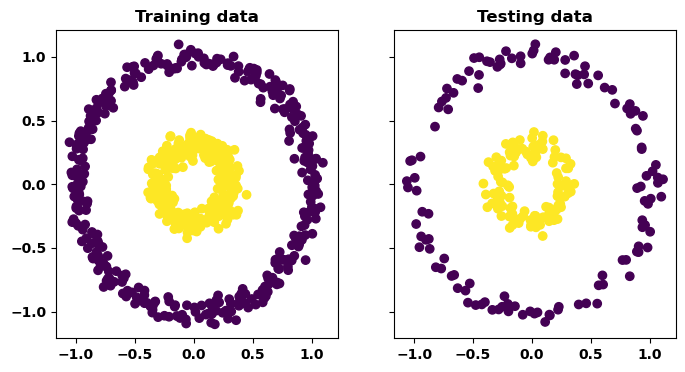

In [9]:
_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
_ = test_ax.set_title("Testing data")

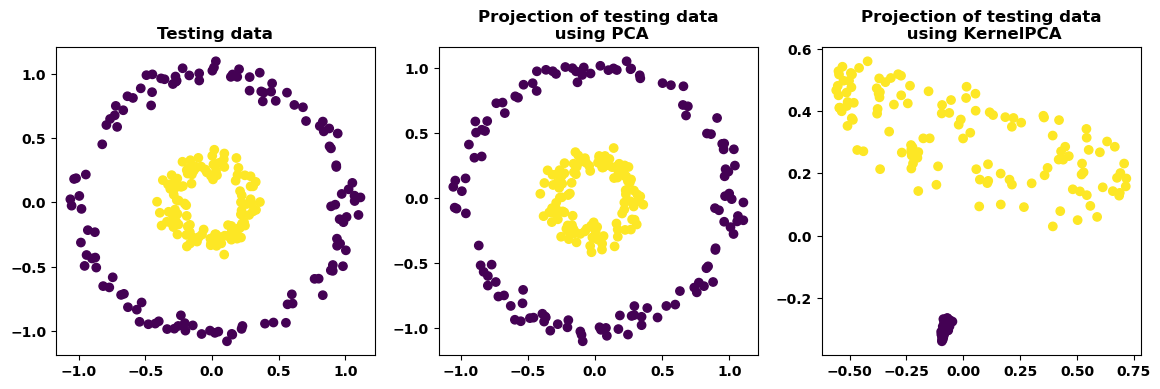

In [10]:
pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

Using the kPCA the data can be decomposed non-linearly while PCA can not. With the given dataset above we can see kPCA able to divide and project the data into two seperate areas while PCA failed to do so. For this reasons, PCA is better to use on data that can be seperated with linear plane otherwise kPCA can be a good alternative.